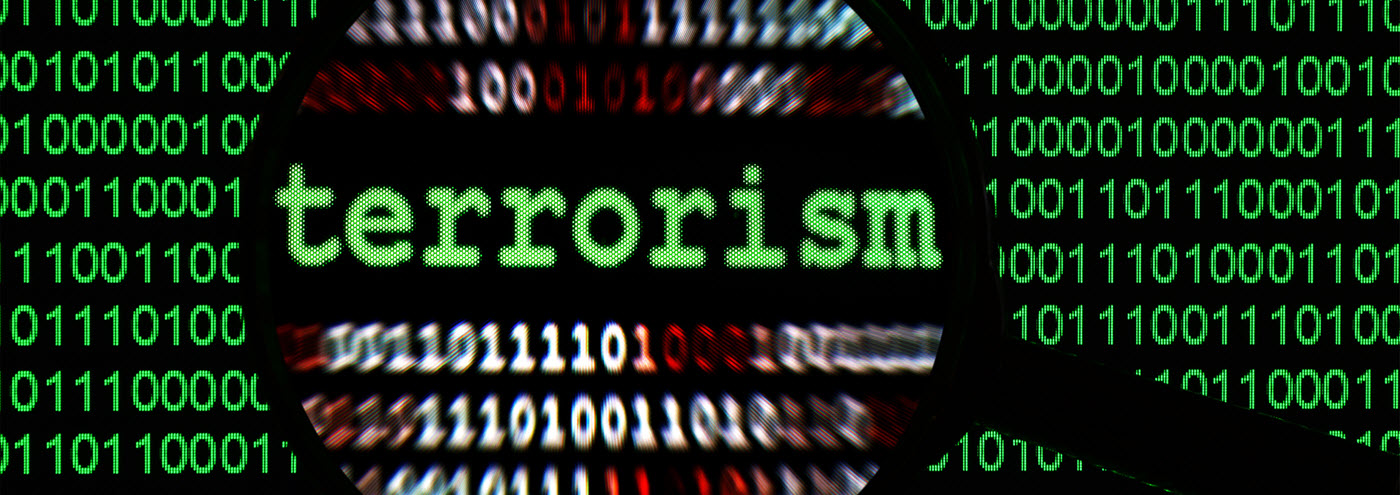
**In this Capstone Project, we are going to perform Exploratory Data Analysis on terrorism dataset to find out the hot zone of terrorism. Exploratory data analysis is nothing but analyzing the given data and finding the trends, patterns and making some assumptions. In this dataset, there are many features including countries, states, regions, gang names, weapon types, target types, years, months, days, and many more features.**



#**1. Importing Libraries and Loading the Dataset**

---



In [61]:
!pip install gitly==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Install_CODE for DataPrep which is needed to get Country Codes
!pip install dataprep
from dataprep.clean import clean_country

In [62]:
# Basic Dependencies
import pandas as pd
import numpy as np
# For basic Ploting graph and charts
import matplotlib.pyplot as plt
%matplotlib inline

# Using Plotly instance methods to plot your data on interactive maps and charts
import plotly.express as px
import plotly.graph_objects as go
from gitly.colab.plot import GitlyPlotter
# Instantiate the object using 'github' or 'git' for static plots
# or 'colab' for default dinamic Plotly plots
gitly = GitlyPlotter('github')

# Convert Country name to ISO-3611 Alpha-3 codes for georaphical map plotting
# Install_CODE: !pip install dataprep

# For more plotting options
import seaborn as sns
# To just ignore all the warnings.
import warnings
warnings.filterwarnings("ignore")

There are few libs and modules that should be installed in Colab in order to generate static plots from Plotly.
Summary: Install Orca, update plotly and update apt-get

apt-get update
pip install plotly>=4.0.0
wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
chmod +x /usr/local/bin/orca
apt-get install xvfb libgtk2.0-0 libgconf-2-4
Done. Have fun! :)


In [ ]:
pd.set_option('max_rows', None) # Set value to print max 25 rows of dataframe in output
pd.set_option('display.max_columns', None) # set value at 'None' to print unlimited column elements in output

In [ ]:
# Loading file from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# File Directory path 
file_path = '/content/drive/MyDrive/AlmaBetter_Capstone_Projects/Global_Terrorism_Dataset.csv'

In [ ]:
# Importing Global Terrorism File.
GT_Data = pd.read_csv(file_path, encoding="ISO-8859-1", low_memory=False)

# Shape of data.
print(GT_Data.shape)

(181691, 135)


# **2. Fixing structural errors and Filtering unwanted elements**

---

Data preprocessing is the first step to be done after collecting data. It is a set of
operations performed on the START (Study of Terrorism and Response to Terrorism)
dataset to modify ambiguous data which can be a bottleneck to analytical results. Data
preprocessing methodology helps in converting this raw data into a more meaningful,
focused, interpretable and readable format. 

> **Removing unwanted columns from dataset**

In [ ]:
# Renaming the columns which contains important values for analysis

GT_Data.rename(columns={'iyear':'Year','extended':'Incident_Duration','city':'City','country_txt':'Country','region_txt':'Region','summary':'Summery', 'success':'Success',
                        'alternative_txt':'Attack_Tactic','attacktype1_txt':'Attack_type','suicide':'Suicide','targtype1_txt':'Target_type','targsubtype1_txt':'Target_SubCat',
                         'gname':'Terror_Group','motive':'Terror_Motive','weaptype1_txt':'Weapon_Type','weapsubtype1_txt':'Weapon_Subtype','nkill':'Total_Killed',
                        'nwoundus':'Total_Wounded','nkillter':'Terrorists_Killed','propextent_txt':'Prorperty_Damage','ishostkid':'Hostage_con',
                        'ransom':'Ransom','ransomamt':'Ransom_amt','ransompaid':'Ransom_amt_paid','hostkidoutcome_txt':'Hostage_outcome'}, inplace=True)

                                 
# Now creating a new dataframe veriable to keep the desired columns 
Modified_GT_data = GT_Data[['Year', 'Incident_Duration', 'City', 'Country', 'Region', 'Summery', 'Success','Attack_Tactic','Attack_type',
                            'Suicide','Target_type','Target_SubCat','Terror_Group','Terror_Motive','Weapon_Type','Weapon_Subtype','Total_Killed','Total_Wounded',
                            'Terrorists_Killed','Prorperty_Damage','Hostage_con','Ransom','Ransom_amt','Ransom_amt_paid','Hostage_outcome']].reset_index(drop=True)
                            
# Printing first three rows
Modified_GT_data.head(3)

,Year,Incident_Duration,City,Country,Region,Summery,Success,Attack_Tactic,Attack_type,Suicide,Target_type,Target_SubCat,Terror_Group,Terror_Motive,Weapon_Type,Weapon_Subtype,Total_Killed,Total_Wounded,Terrorists_Killed,Prorperty_Damage,Hostage_con,Ransom,Ransom_amt,Ransom_amt_paid,Hostage_outcome
0,1970,0,Santo Domingo,Dominican Republic,Central America & Caribbean,NaN,1,NaN,Assassination,0,Private Citizens & Property,Named Civilian,MANO-D,NaN,Unknown,NaN,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,1970,0,Mexico city,Mexico,North America,NaN,1,NaN,Hostage Taking (Kidnapping),0,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,NaN,Unknown,NaN,0.0,NaN,NaN,NaN,1.0,1.0,800000.0,NaN,NaN
2,1970,0,Unknown,Philippines,Southeast Asia,NaN,1,NaN,Assassination,0,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,NaN,Unknown,NaN,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [ ]:
print(Modified_GT_data.shape) # Shape of the dataframe after filttering unwanted columns
Modified_GT_data.isnull().sum() # Number of Null elements in dataframe

(181691, 25)


Year                      0
Incident_Duration         0
City                    434
Country                   0
Region                    0
Summery               66129
Success                   0
Attack_Tactic        152680
Attack_type               0
Suicide                   0
Target_type               0
Target_SubCat         10373
Terror_Group              0
Terror_Motive        131130
Weapon_Type               0
Weapon_Subtype        20768
Total_Killed          10313
Total_Wounded         64702
Terrorists_Killed     66958
Prorperty_Damage     117626
Hostage_con             178
Ransom               104310
Ransom_amt           180341
Ransom_amt_paid      180917
Hostage_outcome      170700
dtype: int64

> **Filling out the missing values**

Above we can see that most of the important column contains alot of NaN or missing values Thus to make a sense out of all that we will start re-placing those values with 'UNKNOWN' value to make it is when we visualize the data via Plots and Graphs. Also You can’t ignore missing data because many algorithms will not accept missing values.


In [ ]:
# City Column
Modified_GT_data['City'].fillna('Unknown', inplace = True)

# Summery Column 
Modified_GT_data['Summery'].fillna('Unknown', inplace = True)

# Terror_Motive column
Modified_GT_data['Terror_Motive'].fillna('Unknown', inplace = True)

# Prorperty_Damage column
Modified_GT_data['Prorperty_Damage'].fillna('Unknown', inplace = True)

# Attack_Tactic column
Modified_GT_data['Attack_Tactic'].fillna('Unknown', inplace = True)

# Target_SubCat column
Modified_GT_data['Target_SubCat'].fillna('Unknown', inplace = True)

# Weapon_Subtype column
Modified_GT_data['Weapon_Subtype'].fillna('Unknown', inplace = True)

# Filling null values in Hostage_outcome column
Modified_GT_data['Hostage_outcome'].fillna('Unknown', inplace = True)

# Summery column
Modified_GT_data['Summery'].fillna('Undocumented', inplace = True)

# Filling null values in Ransom_amt_paid column
Modified_GT_data['Ransom_amt_paid'].fillna(0, inplace = True)

# Filling null values in Ransom_amt column
Modified_GT_data['Ransom_amt'].fillna(0, inplace = True)

# Filling null values in Ransom_amt column
Modified_GT_data['Ransom'].fillna(-9.0, inplace = True)

# Replacing floating values with for better meaningful categorial value
Modified_GT_data[['Hostage_con','Ransom']] = Modified_GT_data[['Hostage_con','Ransom']].replace({0.0:'NO', 1.0:'Yes', -9.0:'Unknown'})

Now, The columns 'Total_Killed', 'Total_Wounded' and 'Terrorists_Killed' also have 10313, 64702 and 66958 NaN values respectively which is alot to ignore and would change the course analysis. Thus, to control that we will replace the NaN values with Mode of the resepective column.

In [ ]:
# Total_Killed Column
Modified_GT_data['Total_Killed'] = Modified_GT_data['Total_Killed'].fillna(Modified_GT_data['Total_Killed'].mode()[0])
# Total_Wounded Column
Modified_GT_data['Total_Wounded'] = Modified_GT_data['Total_Wounded'].fillna(Modified_GT_data['Total_Wounded'].mode()[0])
# Terrorists_Killed Column
Modified_GT_data['Terrorists_Killed'] = Modified_GT_data['Terrorists_Killed'].fillna(Modified_GT_data['Terrorists_Killed'].mode()[0])

# Creating a new Column to show total_Casualities which is just a total number of people who got wounded and 
# killed in that incident including all Attackers, Defenders and Civilians

Modified_GT_data['Total_Casualities'] = Modified_GT_data['Total_Killed'] + Modified_GT_data['Total_Wounded']

>**Minor Data Improvments**



In [ ]:
# # Re-Mapping the actual meaning of the row value in 'Incident_Duration' column as per the DATABASE VERIABLE GUIDE
Modified_GT_data['Incident_Duration'] = Modified_GT_data['Incident_Duration'].replace({0:'More than 24 hours', 1:'Less than 24 hours'})


# Changing Weapon type 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs' with 'Vehicle' for better meaning
Modified_GT_data['Weapon_Type'] = Modified_GT_data['Weapon_Type'].replace({'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)':'Vehicle'})


# Now changing the data type of above columns from float64 to int as deaths/wounded personal count can`t be in decimals for obvious reasons
Modified_GT_data = Modified_GT_data.astype({'Total_Killed':'int','Total_Wounded':'int','Terrorists_Killed':'int','Total_Casualities':'int'})


# Chnaging Attack type 'Hostage Taking (Kidnapping)' with 'Kidnapping' AND 
# 'Hostage Taking (Barricade Incident)' with 'Barricade Incident' for better meaning
Modified_GT_data['Attack_type'] = Modified_GT_data['Attack_type'].replace({'Hostage Taking (Kidnapping)':'Kidnapping','Hostage Taking (Barricade Incident)':'Barricade Incident'})


# Re-Mapping the Property_damaged Terms with meaningful ones
Modified_GT_data['Prorperty_Damage'] = Modified_GT_data['Prorperty_Damage'].replace({'Minor (likely < $1 million)':'Minor: Likely Less than $1 Million',
                                                                                     'Major (likely >= $1 million but < $1 billion)':'Major: Between $1 Million - $1 Billion',
                                                                                     'Catastrophic (likely >= $1 billion)':'Catastrophic: Likely more than $1 Billion'})

In [ ]:
# Changing data type from Float64 to integer
Modified_GT_data = Modified_GT_data.astype({'Ransom_amt':'int','Ransom_amt_paid':'int'})

# Replacing floating values with for better meaningful categorial value
Modified_GT_data[['Ransom_amt','Ransom_amt_paid']] = Modified_GT_data[['Ransom_amt','Ransom_amt_paid']].replace({-99:'Unknown'})

  Converting Country name to ISO 3166-1 alpha-3 codes for map plotting

In [ ]:
Modified_GT_data = clean_country(Modified_GT_data, 'Country', output_format='alpha-3')

# Renaming the column to country_code
Modified_GT_data.rename(columns = {'Country_clean':'Country_code'}, inplace = True)

Country Cleaning Report:
	180892 values cleaned (99.56%)
	799 values unable to be parsed (0.44%), set to NaN
Result contains 180892 (99.56%) values in the correct format and 799 null values (0.44%)


Now we will drop above NaN values aka Non-Existent Countries from Country_code column as those countries doesn`t exist anymore either because they have been split into multiple countries (Ex.Yugoslavia no longer exists. The nation that was Yugoslavia has now been split into several smaller nations, one of which is Macedonia) or got re-named through out the time.

Those counties contribute 0.44% of the data thus removing them wont affect the stats of other countries.

In [ ]:
# Dropping NaN value throughout the dataframe
Modified_GT_data = Modified_GT_data.dropna()

In [ ]:
Modified_GT_data.info() # checking nan value count

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180714 entries, 0 to 181690
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               180714 non-null  int64 
 1   Incident_Duration  180714 non-null  object
 2   City               180714 non-null  object
 3   Country            180714 non-null  object
 4   Region             180714 non-null  object
 5   Summery            180714 non-null  object
 6   Success            180714 non-null  int64 
 7   Attack_Tactic      180714 non-null  object
 8   Attack_type        180714 non-null  object
 9   Suicide            180714 non-null  int64 
 10  Target_type        180714 non-null  object
 11  Target_SubCat      180714 non-null  object
 12  Terror_Group       180714 non-null  object
 13  Terror_Motive      180714 non-null  object
 14  Weapon_Type        180714 non-null  object
 15  Weapon_Subtype     180714 non-null  object
 16  Total_Killed       1

**Now as the data cleaning and sorting as been done. Let`s dive deep into the elements to provide meaningful insights and virtualizations**

#**3. Data Analysis** 
---

This section consists of details regarding the visual results and insights.


#**⋆ Terrorism around the World**


> **Countries that suffered the most number of Terror attacks/Hostile situations since 1970**

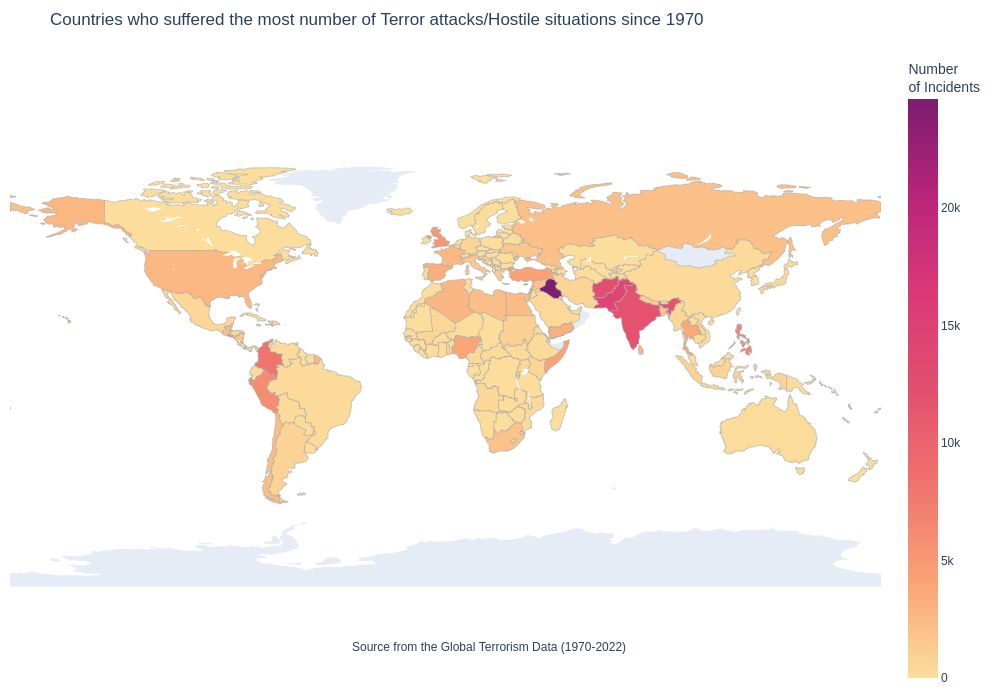

In [96]:
# Creating a table for above objective
most_attacked_countries = Modified_GT_data.groupby(['Country_code','Country'])['Country'].size().reset_index(name='No_of_Incidents')

# Now ploting a interactive world map chart that provides a vistual presentation of the data using plotly

fig = go.Figure(data=go.Choropleth(
    locations = most_attacked_countries['Country_code'],
    z = most_attacked_countries['No_of_Incidents'],
    text = most_attacked_countries['Country'],
    colorscale = 'sunsetdark',
    autocolorscale = False,
    reversescale = False,
    marker_line_color = 'darkgray',
    marker_line_width = 0.5,
    colorbar_title = 'Number<br>of Incidents'))

fig.update_layout(
    title_text='Countries who suffered the most number of Terror attacks/Hostile situations since 1970',
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'),
    annotations = [dict(
        x = 0.55,
        y = 0.05,
        showarrow = False,
        text = 'Source from the Global Terrorism Data (1970-2022)')], height = 800, width = 1000, margin={"r":10,"t":50,"l":10,"b":12})

gitly.show(fig, height = 700, width = 1000)

From above map, We see the number of terrorism attacks by country on this map. **Iraq** – the country has faced staggaring 24636 number of such attacks between 1970 to 2017 which accounted for 13.61% of terrorism attacks in the world.  

> **Number of deaths from terrorism at Differet Regions around the world in between 1970 to 2017**




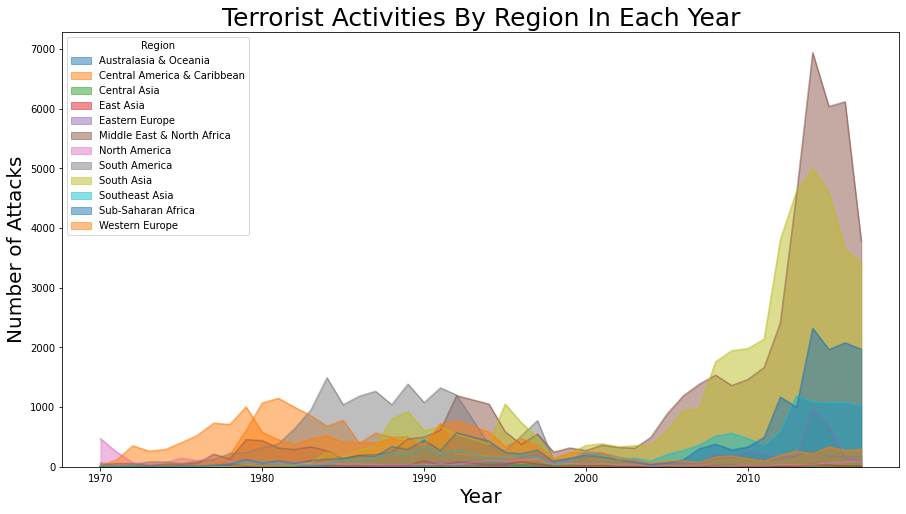

In [ ]:
# Using matplotlib to plot a line chart to vitualize the data above

pd.crosstab(Modified_GT_data.Year, Modified_GT_data.Region).plot(kind='area',stacked=False,figsize=(15,8))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [ ]:
# Death Count and it`s distribution accros the region
total_casualities_con = Modified_GT_data.groupby(['Region'])['Total_Casualities'].sum().reset_index()
total_casualities_con['%per'] = (total_casualities_con['Total_Casualities']/total_casualities_con['Total_Casualities'].sum())*100
total_casualities_con

,Region,Total_Casualities,%per
0,Australasia & Oceania,150,0.036064
1,Central America & Caribbean,28795,6.923023
2,Central Asia,1000,0.240424
3,East Asia,1157,0.278171
4,Eastern Europe,7359,1.769284
5,Middle East & North Africa,138451,33.287012
6,North America,7445,1.789960
7,South America,28891,6.946104
8,South Asia,101894,24.497813
9,Southeast Asia,15618,3.754950


In this chart, we see the number of deaths from terrorism by region. Out of 3,99,380 deaths till now from terrorism included in the Global Terrorism Database 1,35,745 which is roughly 33.27% occurred in the Middle East and North Africa. As when we move to South Asia, the situation doesn`t feel good either as on-paper about 1,00,225 confirmed deaths has been recorded which contribute 25.09% of the total death mark compared to the world. 

Australasia & Oceania has the lowest confirmed death count of 0.03% from terrorism by region.

> **Most Targeted Cities in the world by Terrorism**

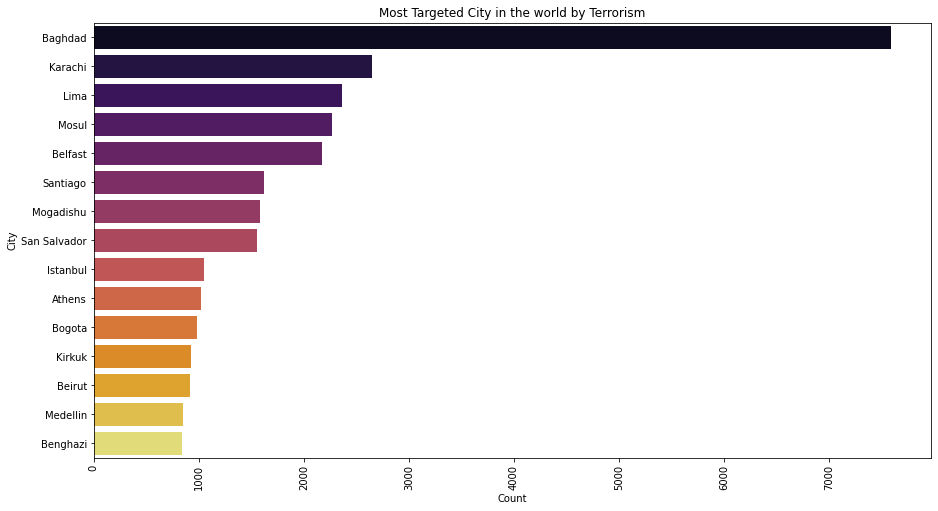

In [ ]:
# Ploting a bar chart with seaborn
total_casualities_city = Modified_GT_data['City'].value_counts().reset_index().rename(columns={'index':'City','City':'Count'})

# Using matplotlib to plot a line chart to vitualize the data above 
sns.barplot(y = total_casualities_city['City'][1:16], x= total_casualities_city['Count'][1:16], palette=('inferno'))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.title('Most Targeted City in the world by Terrorism')
plt.show()



> **Correlation Matrix**




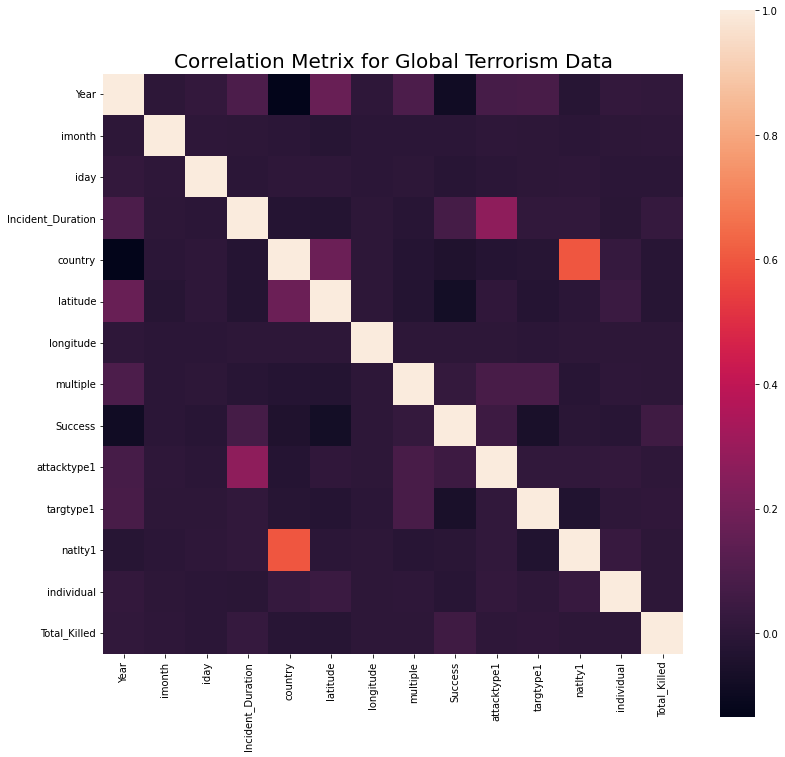

In [ ]:
# Doing correlation Metrix on untouched data for more details 
data_corr = GT_Data[['Year','imonth','iday','Incident_Duration','country','latitude','longitude','multiple','Success','attacktype1','targtype1','natlty1','individual','Total_Killed']]

# Set up the matplotlib plot configuration
plt.subplots(figsize=(13, 13))
# Correlation between different variables
sns.heatmap(data_corr.corr(), annot = False, square=True)
# add overall title
plt.title('Correlation Metrix for Global Terrorism Data', fontsize =20)
plt.show()

Out of 135 variables, we have selected the most significant 14 for this map. Some of those parameters are the day, year, country, latitude, longitude, Success rates of attack, type of attack, target type, number of kills, etc. The correlation matrix where darker the shade of the block, more the
attributes are correlated proportionately.

1.   Here we can see that '***country***' and '***latitude***' are
correlated which is expected. Values of neither of those two parameters change and hence
they show a strong relation. 
2.   Another relation we can see is among '***natlty1***' and '***country***'. There correlation index is **0.6**
Here '***natlty1***' defines the nationality of the attacker and '**country**' defines the country where the
attack took place. This observation shows that most of the attacks are done by the citizen
of their own country. Such a relation provides an interesting insight into how to perceive
international terrorism as the proportion of international terrorism is significantly less in
comparison with domestic terrorism.
3.   There a another mildly strong yet interesting correlation we can observe which is in between '***attacktype1***' and '***Incident_Duration***', here the index is **0.27** which shows the relation between the different type of attack tactic can be a game chager for more resilience in attack duration. 
4.   The block representing '***iyear***' and
'***success***' has a darker shade which means that both these parameters are inversely related to
each other. There correlation index is **-0.086** So, over time, the rate of success of any attack has reduced. This is a noteworthy
observation that in an era of growing terrorism, counter-terrorist forces can restrict the
success factor of attacks more than they used to. 



> **Top 10 active Terrorist groups as per Region**

In [ ]:
attack_per_region = Modified_GT_data.groupby(['Region'])['Attack_type'].count().sort_values(ascending=False)
attack_per_region

Region
Middle East & North Africa     50473
South Asia                     44973
South America                  18978
Sub-Saharan Africa             17546
Western Europe                 16098
Southeast Asia                 12483
Central America & Caribbean    10344
Eastern Europe                  4892
North America                   3280
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Attack_type, dtype: int64

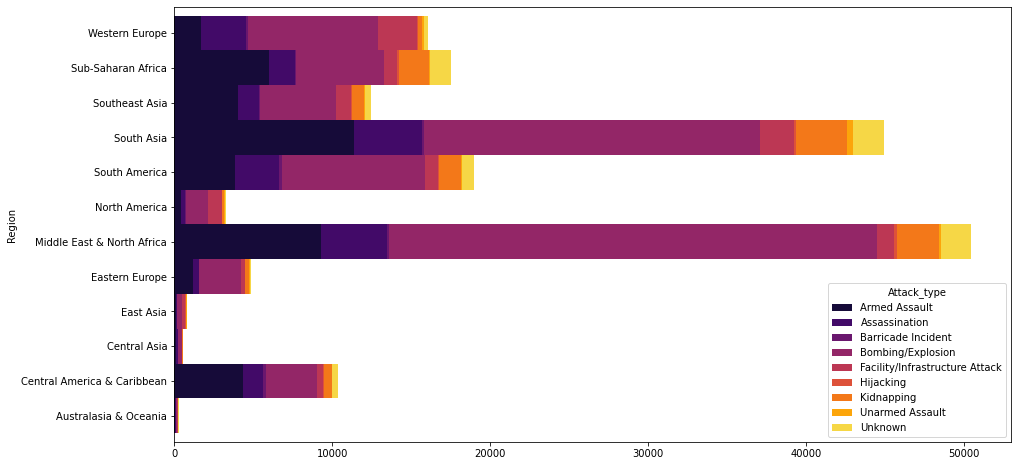

In [ ]:
# Creating a table for above objective
pd.crosstab(Modified_GT_data.Region, Modified_GT_data.Attack_type).plot.barh(stacked=True,width=1,color=sns.color_palette('inferno',9))
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show() #RdYlGn

As per our observation, It is clear that 'Middle East & North Africa' is most dangerous place to be at. Total 49,576 attacks has been faced by them since 1970. Where 'South Asia' is just behind with 44,479 attacks till now.

> **Top 10 Active terrorist Groups since 1970**

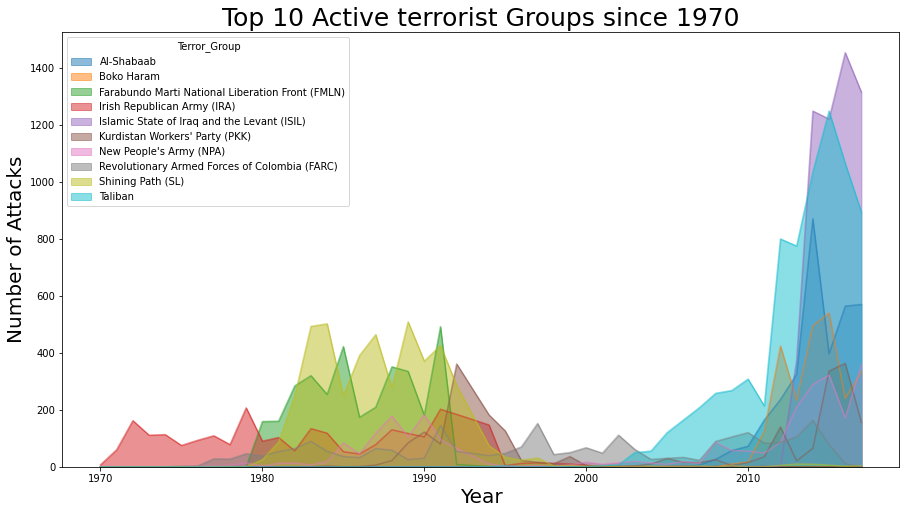

In [ ]:
# Filtering data with top 10 most active groups in the database
top_10_groups = Modified_GT_data[Modified_GT_data['Terror_Group'].isin(Modified_GT_data['Terror_Group'].value_counts()[1:11].index)]

# Using matplotlib to plot a line chart to vitualize the data above

pd.crosstab(top_10_groups.Year, top_10_groups.Terror_Group).plot(kind='area',stacked=False,figsize=(15,8))
plt.title('Top 10 Active terrorist Groups since 1970',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

On the scale of number of terror attacks done by a group since 1970, 'Islamic State of Iraq & the Levant (ISIL)' tops the chart with more than 1400 attacks. while 'Taliban' hold the second place.

> **Total Casulities caused by Top 15 Terrorist Groups accross the world since 1970**

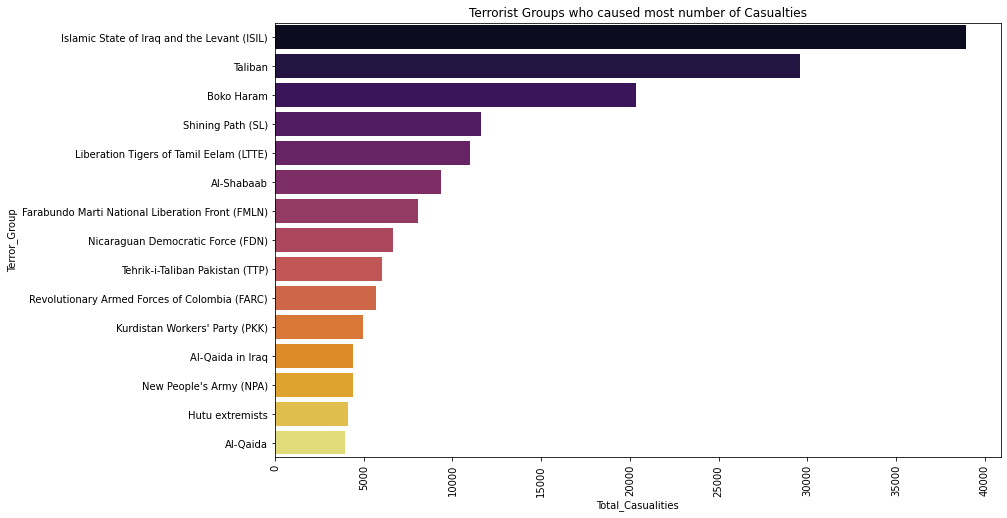

In [ ]:
# Creating a table for above Objective
total_kills = Modified_GT_data.groupby(['Terror_Group'])[['Total_Casualities']].agg('sum').sort_values(by='Total_Casualities', ascending=False)
total_kills.reset_index(inplace=True)

# Ploting a bar chart with seaborn
sns.barplot(y = total_kills['Terror_Group'][1:16], x= total_kills['Total_Casualities'][1:16], palette=('inferno'))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.title('Terrorist Groups who caused most number of Casualties')
plt.show()

After analysis, It is vitual that 'Islamic State of Iraq and the Levant (ISIL)' were on a killing sprea where they murdured 38,793 personal since 1970, Most on compared to other groups. Taliban is again on second place with 29,564 kills.



> **Different Attack methods used by Terrorist across the World**



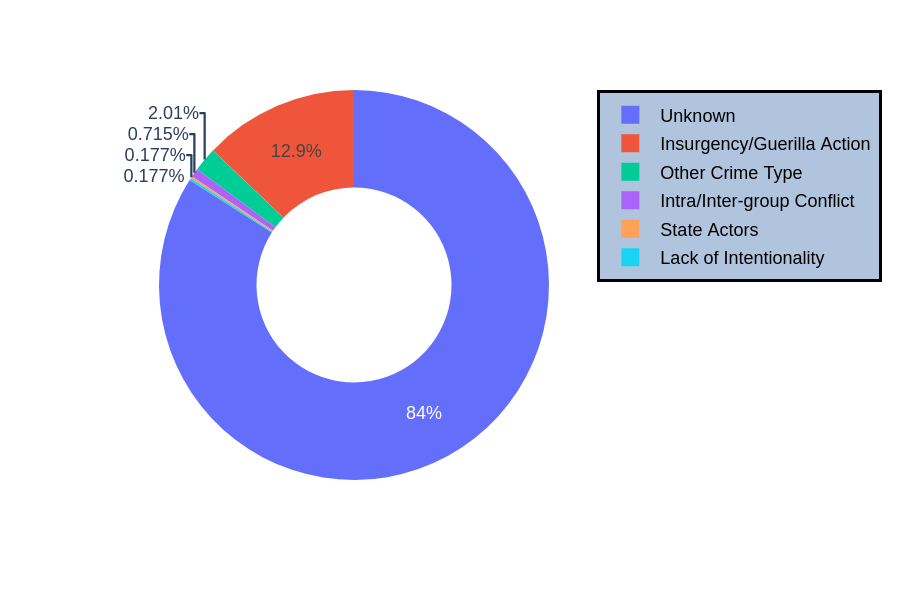

In [75]:
# Creating a filttered daata with respect to top 10 active Terror_Groups
top_attack_tac = Modified_GT_data['Attack_Tactic'].value_counts().reset_index().rename(columns={'index':'Attack_Tactic','Attack_Tactic':'Count'})

# Create a pie plot for better Visualization
fig = px.pie(top_attack_tac, values='Count', names='Attack_Tactic', hole=.5, height = 500, width = 800)

fig.update_layout(legend=dict(
        font=dict(
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    ))
# fig.show()
gitly.show( fig, height = 400, width = 600, scale = 1.5 )

Most used known Attack tatic by terror group is 'Insurgency/Guerilla Action'. Where the majority of tatic is random or just unknown.

#**⋆ Terrorism Activity Trend in India**

> **Terror incidents suffered by India since 1970**

In [ ]:
# Filtering data with India only row values at country column
india_data = Modified_GT_data.loc[Modified_GT_data.Country == 'India'] 

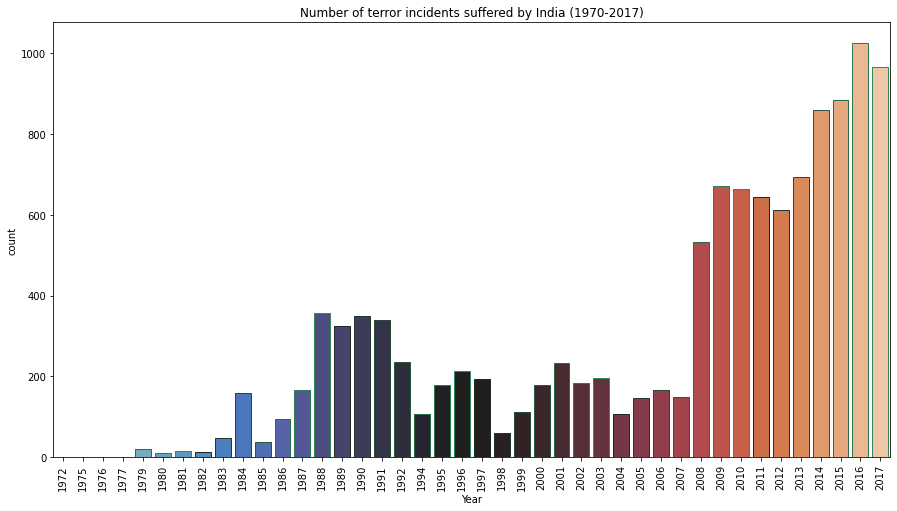

In [ ]:
# Using matplotlib to plot a line chart to vitualize the data above

plt.subplots(figsize=(15,8))
sns.countplot('Year',data= india_data, palette='icefire', edgecolor = sns.dark_palette("seagreen",7))
plt.xticks(rotation = 90)
plt.title('Number of terror incidents suffered by India (1970-2017)')
plt.show()

> **Number of Attacks & Causalities by City since 1970**

In [ ]:
# Grouping the city column with total number of confirmed kills and wounded counts to get an idea of the situation 
attack_loc = india_data['City'].value_counts().reset_index().rename(columns={'index':'City','City':'No_of_Attacks'})
death_count = india_data.groupby(['City'])['Total_Casualities'].sum().reset_index()

death_count_per_loc = attack_loc.merge(death_count, how='inner', on='City')
death_count_per_loc[:10]

,City,No_of_Attacks,Total_Casualities
0,Srinagar,658,769
1,Unknown,624,1458
2,Imphal,426,140
3,New Delhi,157,378
4,Amritsar,138,376
5,Sopore,102,99
6,Ludhiana,77,165
7,Guwahati,77,159
8,Anantnag,76,102
9,Jammu,57,267


In [ ]:
# Exploring the most attacked City in India i.e Srinagar
srinagar_data = india_data.loc[india_data.City == 'Srinagar']
srinagar_terror_log = srinagar_data['Terror_Group'].value_counts()
srinagar_terror_log.head(10)

Unknown                               306
Muslim Separatists                     55
Jammu and Kashmir Liberation Front     45
Kashmiri extremists                    37
Muslim Militants                       35
Hizbul Mujahideen (HM)                 31
Lashkar-e-Taiba (LeT)                  21
Separatists                            21
Jaish-e-Mohammad (JeM)                 12
Al-Mansoorian                          12
Name: Terror_Group, dtype: int64

Since 1972, Srinagar which is in Jammu and Kashmir has been the center of the dispute and terror attacks in india. Srinagar has been under attacks record 658 times on which 769 poeple have lost there lives. Almost half of those number of attacks has been done by Unknown groups. On the second place, Srinagar has been terrorised 55 times by 'Muslim Separatists' and 45 times by 'Kashmiri extremists'.



> **Top 10 Terrorist Group activities and there most used Attack Tactic agaist India Since 1970**





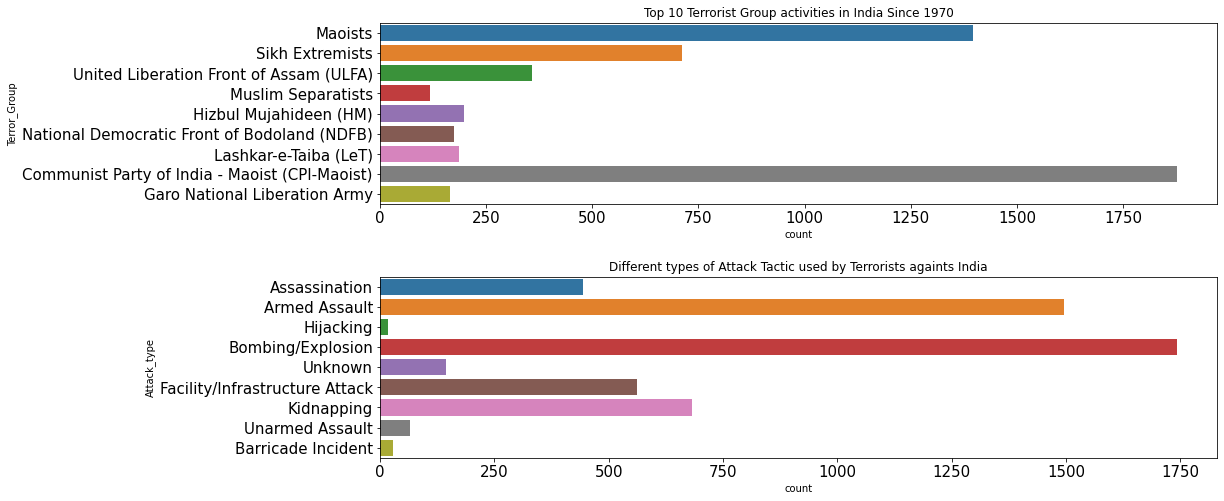

In [ ]:
# Setting up the subplot
fig,ax = plt.subplots(2, 1, figsize = (15,8))
# Creating a filttered daata with respect to top 10 active Terror_Groups
top_groups_ind = india_data[india_data['Terror_Group'].isin(india_data['Terror_Group'].value_counts()[1:10].index)]

sns.countplot(y = 'Terror_Group', data = top_groups_ind, ax = ax[0])
ax[0].set_title('Top 10 Terrorist Group activities in India Since 1970')

# And Most used attack tactic used
sns.countplot(y='Attack_type', data = top_groups_ind, ax=ax[1])
ax[1].set_title('Different types of Attack Tactic used by Terrorists againts India')

plt.subplots_adjust(hspace=0.4, wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

> **Effective targetting of the Private Citizens & Property for Terrorism and Destruction**


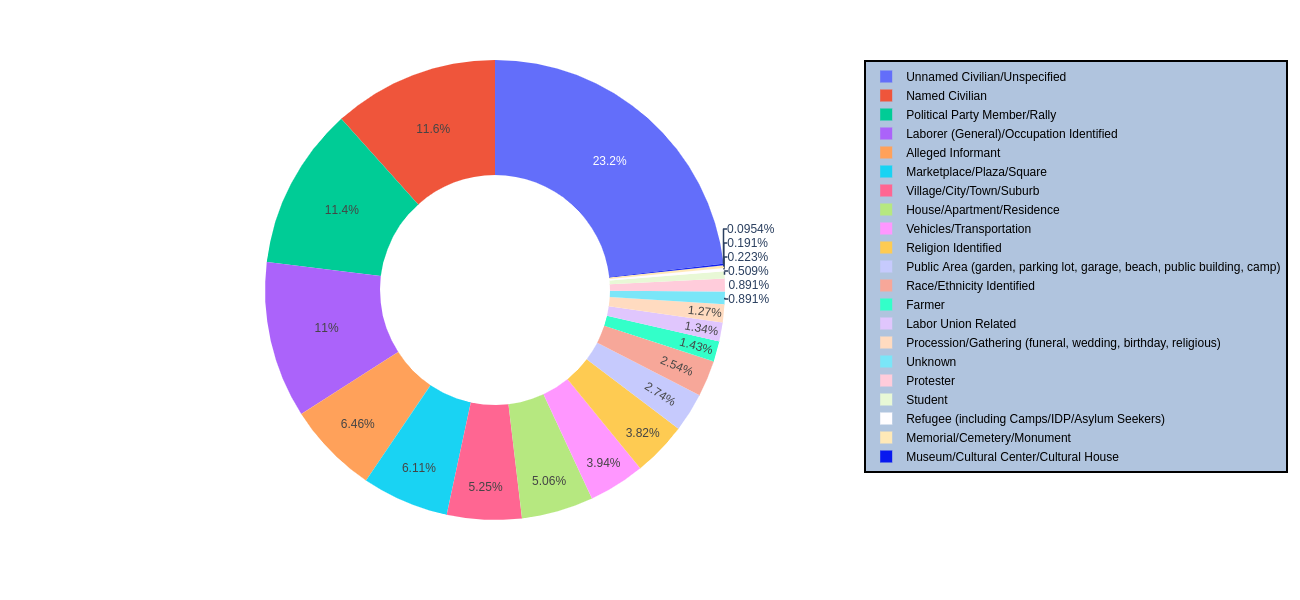

In [88]:
# Filtering data
ind_pcp_data = Modified_GT_data.loc[(Modified_GT_data.Country == 'India') & (Modified_GT_data['Target_type'] == 'Private Citizens & Property')]

# with the largest target type
pcp_data = india_data.loc[india_data['Target_type'] == 'Private Citizens & Property']                                                                                                                                                                                                                                                                                                                                                                      
df_pcp_data = pcp_data['Target_SubCat'].value_counts().reset_index().rename(columns={'index':'Target Sub-Category type','Target_SubCat':'No. of Incidents'})

# print(f'\nTop 5 Terror Sub_Category Targets: \n{df_pcp_data}')

fig = px.pie(df_pcp_data, values='No. of Incidents', names='Target Sub-Category type', hole=.5, height = 600, width = 1200)

fig.update_layout(legend=dict(
        font=dict(
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    ))

gitly.show(fig, height = 600, width = 1300)
# fig.show()


In [82]:
print(f'\n\nNumber of Private Citizens & Property related incidents since 1970: {pcp_data.shape[0]}')



Number of Private Citizens & Property related incidents since 1970: 3144




> **Total Number of Killed and wounded personals caused by Terrorism in India**



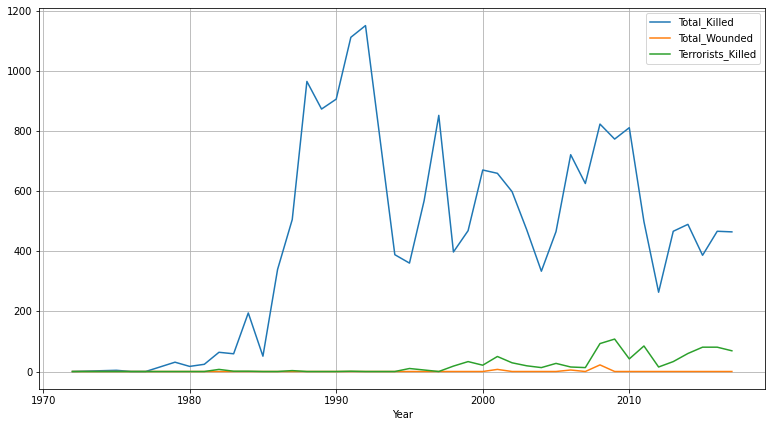

In [ ]:
# Creating the relavent dataframe for personals
india_casulities_data = india_data.groupby(['Year'])[['Total_Killed','Total_Wounded','Terrorists_Killed']].sum()
india_casulities_data.reset_index(inplace=True)
# Plotting simple line graph w.r.t Years
india_casulities_data.set_index('Year').plot(figsize=(13,7), grid=True)
plt.show()

In India, Till now 18,663 people has been confirmed dead, 34 comfirmed wounded agaist 933 terrorists has been encountered. As per calender year In 1992, India seen the most deadlist year of terrorism at which total 1076 personal had been killed. On the other hand, On year 2009 india Encountered the most of number of terrorist which is 108.

#**⋆ Conventional Stratergies of Terrorists**





> **Sucide Attacks**



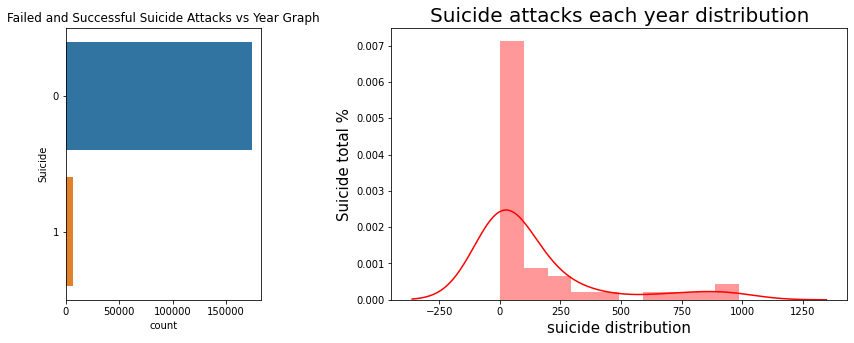

In [ ]:
# Setting up the subplot
fig,ax = plt.subplots(1, 2, figsize = (14,5),  gridspec_kw={'width_ratios': [.30, .70]})
# Graph for Sucide attempts made
sns.countplot(y = 'Suicide', data = Modified_GT_data, ax = ax[0])
ax[0].set_title('Failed and Successful Suicide Attacks vs Year Graph')
# grapha for Sucide Distribution
fig = sns.distplot(Modified_GT_data[["Year","Suicide"]].groupby("Year").aggregate(np.sum), color = 'r')
fig.set_xlabel("suicide distribution",size=15)
fig.set_ylabel("Suicide total %",size=15)
plt.title('Suicide attacks each year distribution', size = 20)

plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.show()



> **Hostage and Kidnapping situation Analysis**



In [ ]:
# Filtering Positive Hostage and Kidnapping situation from others
# 1 = "Yes" The victims were taken hostage or kidnapped.
# 0 = "No" The victims were not taken hostage or kidnapped.
# -9 = "Unknown" It is unknown if the victims were taken hostage or kidnapped.

positive_HostKid_df = Modified_GT_data[Modified_GT_data.Hostage_con == 'Yes']

In [ ]:
positive_HostKid_df.reset_index(drop=True).head(3)

,Year,Incident_Duration,City,Country,Region,Summery,Success,Attack_Tactic,Attack_type,Suicide,Target_type,Target_SubCat,Terror_Group,Terror_Motive,Weapon_Type,Weapon_Subtype,Total_Killed,Total_Wounded,Terrorists_Killed,Prorperty_Damage,Hostage_con,Ransom,Ransom_amt,Ransom_amt_paid,Hostage_outcome,Total_Casualities,Country_code
0,1970,More than 24 hours,Mexico city,Mexico,North America,Unknown,1,Unknown,Kidnapping,0,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,Unknown,Unknown,0,0,0,Unknown,Yes,Yes,800000,0,Unknown,0,MEX
1,1970,More than 24 hours,Caracas,Venezuela,South America,Unknown,1,Unknown,Kidnapping,0,Business,Retail/Grocery/Bakery,Armed Forces of National Liberation- Venezuela...,Unknown,Unknown,Unknown,0,0,0,Unknown,Yes,Yes,110000,110000,Hostage(s) released by perpetrators,0,VEN
2,1970,More than 24 hours,Unknown,Spain,Western Europe,Unknown,0,Unknown,Kidnapping,0,Government (General),Politician or Political Party Movement/Meeting...,1st of May Group,Unknown,Unknown,Unknown,0,0,0,Unknown,Yes,Yes,0,0,Unknown,0,ESP


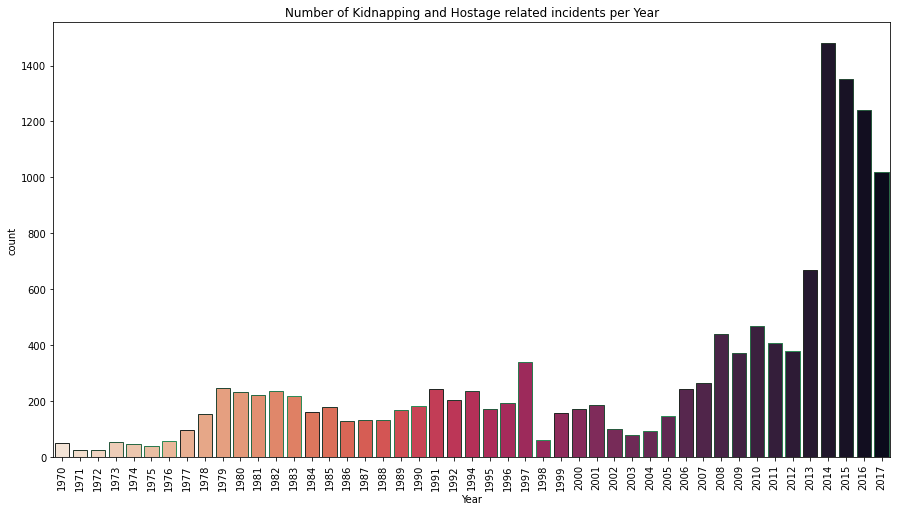



Since 2004, There is sudden increase in Kidnapping/Hostage related incidents accross the world. 
The situation seems controlled till year 2012, but again it can been seen that the number of incidents increasing exponentially.


In [ ]:
# Using matplotlib to plot a line chart to vitualize the data above

plt.subplots(figsize=(15,8))
sns.countplot('Year', data= positive_HostKid_df, palette='rocket_r', edgecolor = sns.dark_palette("seagreen",7))
plt.xticks(rotation = 90)
plt.title('Number of Kidnapping and Hostage related incidents per Year')
plt.show()
print("""\n\nSince 2004, There is sudden increase in Kidnapping/Hostage related incidents accross the world. 
The situation seems controlled till year 2012, but again it can been seen that the number of incidents increasing exponentially.""")

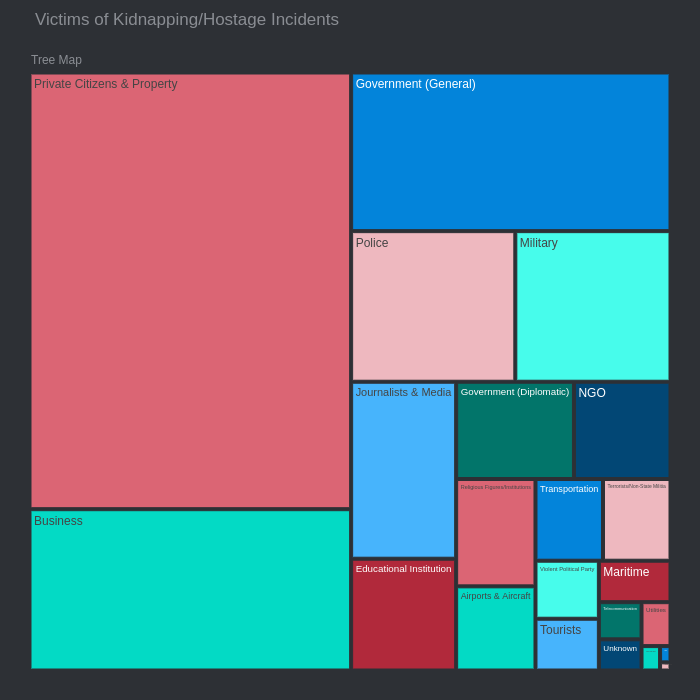

In [93]:
targetTy_data = positive_HostKid_df['Target_type'].value_counts().reset_index().rename(columns={'index':'Target Category type','Target_type':'No. of Incidents'})

fig = px.treemap(targetTy_data, path=[px.Constant("Tree Map"), 'Target Category type' ], 
                 color_discrete_sequence=['#DB6574', '#03DAC5', '#0384da'],
                 values='No. of Incidents')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height = 600, width = 600,
                   plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                        font=dict(color='#8a8d93'), title= 'Victims of Kidnapping/Hostage Incidents')


gitly.show(fig, height = 700, width = 700)

In [ ]:
targetTy_data[:10]

,Target Category type,No. of Incidents
0,Private Citizens & Property,4965
1,Business,1834
2,Government (General),1791
3,Police,874
4,Military,826
5,Journalists & Media,657
6,Educational Institution,415
7,Government (Diplomatic),405
8,NGO,332
9,Religious Figures/Institutions,301


In [ ]:
# filtering successful_hostage/kidnap incident from main data
successful_ransom_data = positive_HostKid_df[(positive_HostKid_df.Ransom_amt != 0) & (positive_HostKid_df.Ransom_amt_paid != 0) & (positive_HostKid_df.Ransom_amt != 'Unknown') & (positive_HostKid_df.Ransom_amt_paid != 'Unknown')]
# filtering failed_hostage/kidnap incident from main data
failed_ransom_data = positive_HostKid_df[(positive_HostKid_df.Ransom_amt != 0) & (positive_HostKid_df.Ransom_amt_paid == 0)]
# filtering hostage/kidnap incident where No Ransom was demanded
NO_ransom_data = positive_HostKid_df[(positive_HostKid_df.Ransom_amt == 0) & (positive_HostKid_df.Ransom_amt_paid == 0)]

In [ ]:
Success_rate = round((successful_ransom_data.shape[0]/positive_HostKid_df.shape[0])*100, 2)
max_ransom_demanded = successful_ransom_data['Ransom_amt'].max()
max_ransom_awarded = successful_ransom_data['Ransom_amt_paid'].max()
fail_rate = round((failed_ransom_data.shape[0]/positive_HostKid_df.shape[0])*100, 2)
Neutral_situation_rate = round((NO_ransom_data.shape[0]/positive_HostKid_df.shape[0])*100, 2)

print(f'\nSuccessful Kidnapping/Hostage attack for where ransom amount was given to attackers: {Success_rate}')
print(f'\nMaximum ransom amount($) demanded by attackers: {max_ransom_demanded}')
print(f'\nMaximum ransom amount($) given to attackers: {max_ransom_awarded}')
print(f'\nFailed Kidnapping/Hostage attack for where no ransom amount was given to attackers: {fail_rate}')
print(f'\nNeutral Kidnapping/Hostage attack for where no ransom amount was demanded from attackers: {Neutral_situation_rate}')


Successful Kidnapping/Hostage attack for where ransom amount was given to attackers: 1.25

Maximum ransom amount($) demanded by attackers: 100000000

Maximum ransom amount($) given to attackers: 41000000

Failed Kidnapping/Hostage attack for where no ransom amount was given to attackers: 3.46

Neutral Kidnapping/Hostage attack for where no ransom amount was demanded from attackers: 92.65


**Hostage/Kidnapping result after either giving Ransom or rescue mission by Anti-terror forces**

In [ ]:
hostage_resolution = positive_HostKid_df['Hostage_outcome'].value_counts().reset_index().rename(columns={'index':'Hostage_Result','Hostage_outcome':'count'})

hostage_resolution['Chance (%)'] = round((hostage_resolution['count']/hostage_resolution['count'].sum())*100,2)

hostage_resolution

,Hostage_Result,count,Chance (%)
0,Unknown,6239,46.04
1,Hostage(s) released by perpetrators,3089,22.80
2,Hostage(s) killed (not during rescue attempt),2501,18.46
3,Combination,1013,7.48
4,Successful Rescue,533,3.93
5,Hostage(s) escaped (not during rescue attempt),156,1.15
6,Attempted Rescue,19,0.14




> **Most Common Main Weapon and Sub-Weapon Type used by Terrorist Groups across the World**



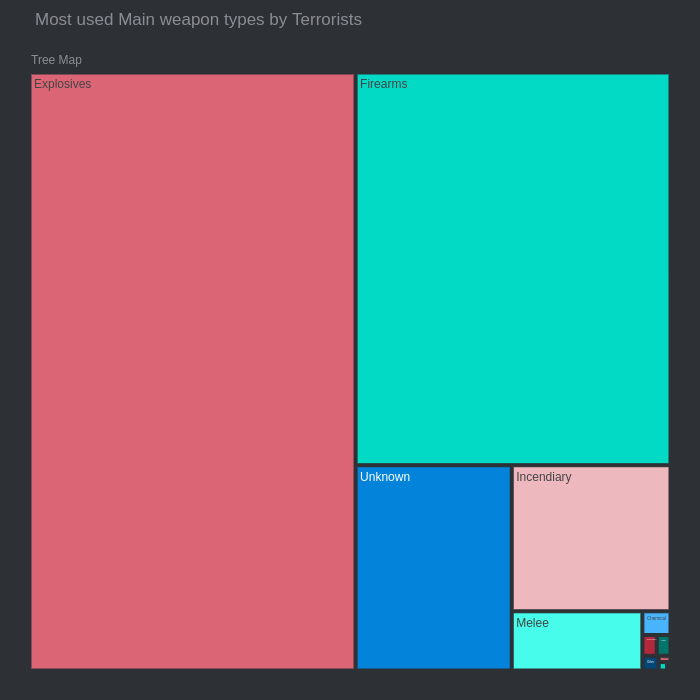

In [95]:
# Main-Weapon Plot
weapons_data = Modified_GT_data['Weapon_Type'].value_counts()
weapons_data = pd.DataFrame(weapons_data)
weapons_data.reset_index(level=0, inplace=True)
weapons_data.columns = ['Weapon_Type', 'Count']

fig = px.treemap(weapons_data, path=[px.Constant("Tree Map"), 'Weapon_Type'], 
                 color_discrete_sequence=['#DB6574', '#03DAC5', '#0384da'],
                 values='Count')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height = 600, width = 600,
                   plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                        font=dict(color='#8a8d93'), title= 'Most used Main weapon types by Terrorists')

gitly.show(fig, height = 700, width = 700)

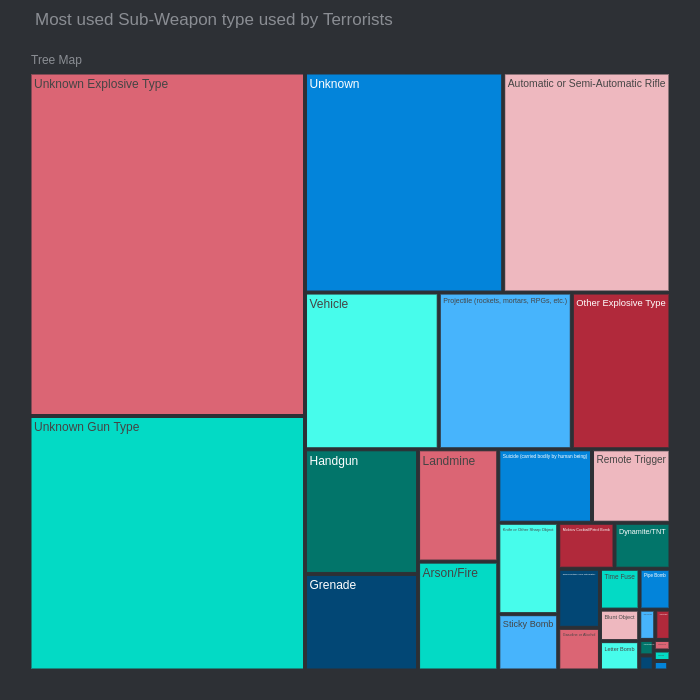

In [94]:
# Sub-Weapon Plot
subweapons_data = Modified_GT_data['Weapon_Subtype'].value_counts()
subweapons_data = pd.DataFrame(subweapons_data)
subweapons_data.reset_index(level=0, inplace=True)
subweapons_data.columns = ['Weapon_Subtype', 'Count']

fig = px.treemap(subweapons_data, path=[px.Constant("Tree Map"), 'Weapon_Subtype' ], 
                 color_discrete_sequence=['#DB6574', '#03DAC5', '#0384da'],
                 values='Count')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height = 600, width = 600,
                   plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                        font=dict(color='#8a8d93'), title= 'Most used Sub-Weapon type used by Terrorists')

gitly.show(fig, height = 700, width = 700)

Seems like Terrorist do like 'Explosives' very much like this is the most used Weapon category across the world terror groups. There have been around 90626 incidents related to Explosives and Bombings. Where as Terorrists also have used confirmed 56397 Firearms related attacks.



> **Most Targeted Category by Terror Groups** 



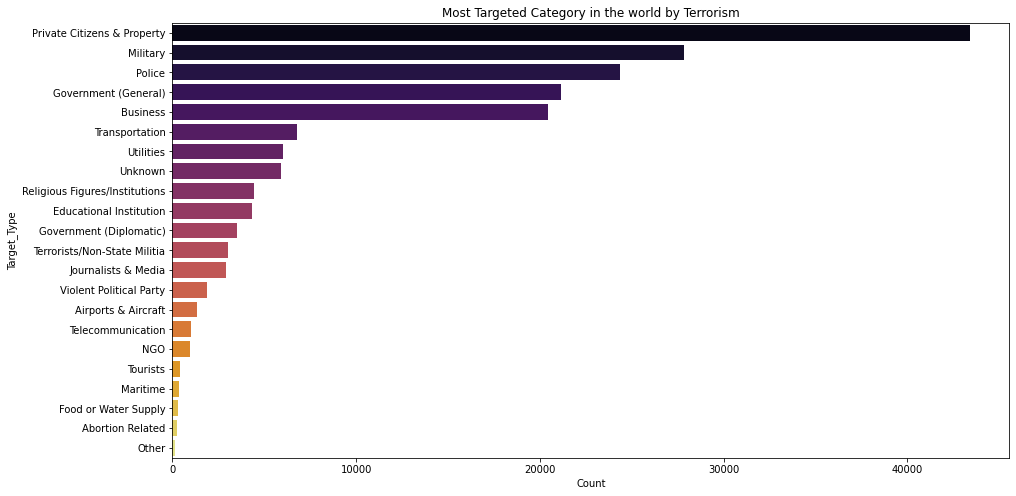

In [ ]:
# Ploting a bar chart Target Category
target_data = Modified_GT_data['Target_type'].value_counts().reset_index().rename(columns={'index':'Target_Type','Target_type':'Count'})

# Using matplotlib to plot a line chart to vitualize the data above 
sns.barplot(y = target_data['Target_Type'], x= target_data['Count'], palette=('inferno'))
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.title('Most Targeted Category in the world by Terrorism')
plt.show()



> **Targeted Vandalism caused by Terrorism since 1970**



In [ ]:
# Creating a filttered daata with respect to top 10 active Terror_Groups
pro_destruct = Modified_GT_data['Prorperty_Damage'].value_counts().reset_index().rename(columns={'index':'Prorperty_Damage','Prorperty_Damage':'Count'})
pro_destruct

,Prorperty_Damage,Count
0,Unknown,136781
1,Minor: Likely Less than $1 Million,43028
2,Major: Between $1 Million - $1 Billion,899
3,Catastrophic: Likely more than $1 Billion,6


As per the records, There have been staggaring 1,33,087 incidents where the property damage was unassesible or unrecorded. However As per the frequency,Terror attacks are more likely to hard a Minor Category of property damaged which is around or less than 1 Million Dollars, which obviously doesnt sound Minor. Till now, only 6 Incidents have been confirmed where the property damaged is likely to be more than 1 Billion Dollars

# **4. Conclusion**
---

*   Iraq – the country has faced staggaring 24636 number of such attacks between 1970 to 2017 which accounted for 13.61% of terrorism attacks in the world.
*   Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.
*   Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.
*   Middle East and North Africa and South Asia are the two regions who encountered the most number of terror attacks since 1970. 
*   For most of the attacks, The target is Private Citizens & property and the next is on Military leads.
*   Most of the attacks were through either Bombing or Explosion.
*   Most used known Attack tatic by terror group is 'Insurgency/Guerilla Action'. Where the majority of tatic is random or just unknown.
*   'Islamic State of Iraq and the Levant (ISIL)' were on a killing sprea where they murdured 38,793 personal since 1970, Most on compared to other groups. Taliban is again on second place with 29,564 kills.
*   'Islamic State of Iraq & the Levant (ISIL)' and 'Taliban' are two most active Terorrist groups in the last 5 years. 
*   From Correlation Mterix, We concluded that column elements 'natlty1' and 'country' are have strong relationship which is evident that the Country is most affacted by its own population and social disturbences most likely due to Civil war or local terror groups.
*   Srinagar which is in Jammu and Kashmir has been the center of the dispute and terror attacks in india.


# **5. References**

---



*   Official Global Terrorism Site for insights and dataset: https://ourworldindata.org/terrorism
*   AlmaBetter Capstone Project Tab: https://grow.almabetter.com/data-science/projects/Global-Terrorism-Dataset
*   Wikipedia : https://en.wikipedia.org/wiki/Terrorism


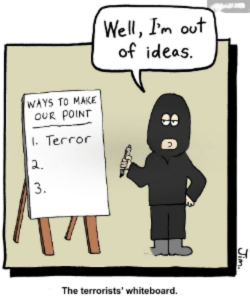